## FINAL — WORKING TIME-LAPSE CLUSTERING ANIMATION

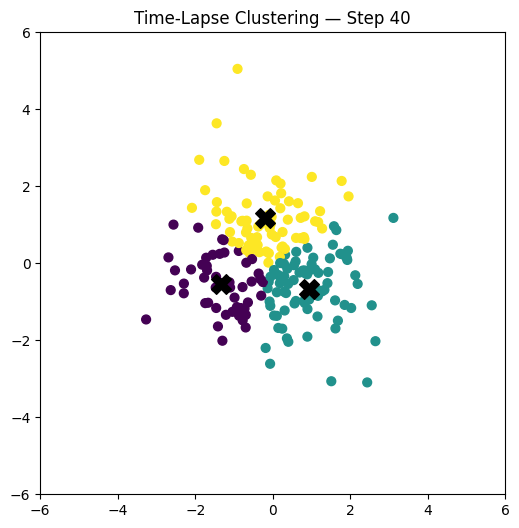

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import PillowWriter
from sklearn.cluster import KMeans

# ---------------------------------------------------
# Output directory
# ---------------------------------------------------
os.makedirs("gifs", exist_ok=True)

# ---------------------------------------------------
# Generate initial data
# ---------------------------------------------------
np.random.seed(42)

n_points = 200
X = np.random.randn(n_points, 2)

# Simulated motion over time
velocity = np.random.randn(n_points, 2) * 0.02

# ---------------------------------------------------
# Animation settings
# ---------------------------------------------------
n_frames = 40
k = 3

# ---------------------------------------------------
# Figure
# ---------------------------------------------------
fig, ax = plt.subplots(figsize=(6, 6))

scatter = ax.scatter(X[:, 0], X[:, 1], c="gray", s=40)
centroids_plot = ax.scatter([], [], s=200, c="black", marker="X")

ax.set_xlim(-6, 6)
ax.set_ylim(-6, 6)
ax.set_title("Time-Lapse Clustering")

# ---------------------------------------------------
# Animation
# ---------------------------------------------------
writer = PillowWriter(fps=5)

with writer.saving(fig, "gifs/time_lapse_clustering.gif", dpi=120):

    for t in range(n_frames):

        # Move points slightly
        X = X + velocity

        # Run clustering
        kmeans = KMeans(n_clusters=k, n_init=10, random_state=0)
        labels = kmeans.fit_predict(X)
        centers = kmeans.cluster_centers_

        # Update scatter
        scatter.set_offsets(X)
        scatter.set_array(labels)

        # Update centroids
        centroids_plot.set_offsets(centers)

        ax.set_title(f"Time-Lapse Clustering — Step {t+1}")

        writer.grab_frame()

plt.show()
